## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [102]:
# 数据采集
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
import numpy as np

data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]
feature = data['feature_names']

## Random Choose Method

In [14]:
def price(rm, k, b):
    return rm * k + b

def rmse(prediction, y):
    return sum((y1 - y2) ** 2 for y1, y2 in zip(list(prediction), list(y))) / len(y)
def mae(prediction, y):
    return sum(abs(y1 - y2) for y1, y2 in zip(list(prediction), list(y))) / len(y)

def random_prediction(X_rm, y, loss, trying_times):   
    min_loss = float('inf')
    for i in range(trying_times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        l = loss(price(X_rm, k, b), y)
        if min_loss > l:
            min_loss = l
            print('When time is : {}, get_best k is : {}, get_best b is : {}, and loss is : {}'.format(i, k, b, min_loss))

In [15]:
# RMSE
random_prediction(X_rm, y, rmse, 1000)

When time is : 0, get_best k is : -14.897706942047307, get_best b is : 65.67265902054447, and loss is : 2876.3044705876036
When time is : 2, get_best k is : -0.987844793134343, get_best b is : 36.80165959646047, and loss is : 158.7338882212154
When time is : 33, get_best k is : 12.129006678286757, get_best b is : -59.234036965028714, and loss is : 78.81149644100151
When time is : 226, get_best k is : 3.8248525730448506, get_best b is : 1.3004209699398928, and loss is : 65.19218663966738
When time is : 351, get_best k is : 10.81442880434507, get_best b is : -43.17754016475541, and loss is : 50.127403617478755
When time is : 537, get_best k is : 10.385889284676992, get_best b is : -42.5135237088262, and loss is : 44.463267893983634


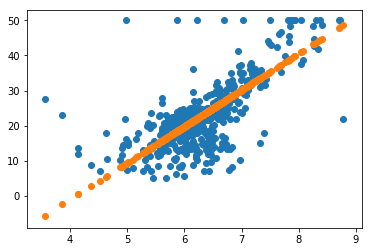

In [17]:
k = 10.386
b = -42.514
price_by_random_k_and_b = [price(rm, k, b) for rm in X_rm]

plt.scatter(X_rm, y)
plt.scatter(X_rm, price_by_random_k_and_b)

In [16]:
# MAE
random_prediction(X_rm, y, mae, 1000)

When time is : 0, get_best k is : 48.115351134143395, get_best b is : -4.900713581321142, and loss is : 274.9538703917115
When time is : 1, get_best k is : 2.3775966569290006, get_best b is : -49.24198609064791, and loss is : 56.83246670536995
When time is : 4, get_best k is : -12.994783205933373, get_best b is : 75.66427493147447, and loss is : 28.75137141642013
When time is : 31, get_best k is : -4.75859594796016, get_best b is : 53.745500180812314, and loss is : 9.004170126629958
When time is : 60, get_best k is : 2.7724085442713857, get_best b is : 8.903347601795815, and loss is : 7.202562310541573
When time is : 82, get_best k is : 9.413238750870832, get_best b is : -38.563437680418275, and loss is : 4.919716717872896


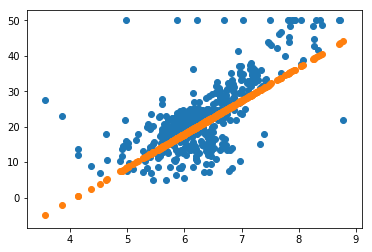

In [18]:
k = 9.413
b = -38.563
price_by_random_k_and_b = [price(rm, k, b) for rm in X_rm]

plt.scatter(X_rm, y)
plt.scatter(X_rm, price_by_random_k_and_b)

## Supervised Direction

In [96]:
def supervised_direction_prediction(X_rm, y, loss, trying_times):   
    direction = [
        (+1, -1),  
        (+1, +1), 
        (-1, -1), 
        (-1, +1),
    ]
    min_loss = float('inf')
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100
    next_direction = random.choice(direction)
    scalar = 0.1
    for i in range(trying_times):
        k_direction, b_direction = next_direction
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)
        if min_loss > current_loss:
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            next_direction = next_direction
            print('When time is : {}, get_best k is : {}, get_best b is : {}, and loss is : {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)


In [97]:
supervised_direction_prediction(X_rm, y, rmse, 2000)

When time is : 0, get_best k is : -57.37017244200803, get_best b is : -61.04811661345054, and loss is : 199473.37883118782
When time is : 1, get_best k is : -57.270172442008025, get_best b is : -60.94811661345054, and loss is : 198820.29720961725
When time is : 2, get_best k is : -57.170172442008024, get_best b is : -60.848116613450536, and loss is : 198168.2867599147
When time is : 3, get_best k is : -57.07017244200802, get_best b is : -60.748116613450534, and loss is : 197517.3474820794
When time is : 4, get_best k is : -56.97017244200802, get_best b is : -60.64811661345053, and loss is : 196867.47937611133
When time is : 5, get_best k is : -56.87017244200802, get_best b is : -60.54811661345053, and loss is : 196218.68244201085
When time is : 6, get_best k is : -56.77017244200802, get_best b is : -60.44811661345053, and loss is : 195570.95667977797
When time is : 7, get_best k is : -56.67017244200802, get_best b is : -60.34811661345053, and loss is : 194924.3020894127
When time is : 

When time is : 245, get_best k is : -32.87017244200768, get_best b is : -36.54811661345019, and loss is : 71485.70866515904
When time is : 246, get_best k is : -32.77017244200768, get_best b is : -36.44811661345019, and loss is : 71095.0641511189
When time is : 247, get_best k is : -32.670172442007676, get_best b is : -36.34811661345019, and loss is : 70705.49080894639
When time is : 248, get_best k is : -32.570172442007674, get_best b is : -36.248116613450186, and loss is : 70316.98863864127
When time is : 249, get_best k is : -32.47017244200767, get_best b is : -36.148116613450185, and loss is : 69929.55764020364
When time is : 250, get_best k is : -32.37017244200767, get_best b is : -36.04811661345018, and loss is : 69543.19781363352
When time is : 251, get_best k is : -32.27017244200767, get_best b is : -35.94811661345018, and loss is : 69157.90915893076
When time is : 252, get_best k is : -32.17017244200767, get_best b is : -35.84811661345018, and loss is : 68773.69167609561
When 

## Gradient Descent

In [111]:
def gd(X_rm, y, loss, trying_times):
    min_loss = float('inf')
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100
    best_k = 0
    best_b = 0
    scalar = 0.001
    for i in range(trying_times):
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)
        if current_loss < min_loss:
            best_k = current_k
            best_b = current_b
            min_loss = current_loss
            print('When time is : {}, get_best k is : {}, get_best b is : {}, and loss is : {}'.format(i, best_k, best_b, min_loss))
        current_k = current_k - scalar * 2 * np.dot((price_by_k_and_b - y), y)  / len(y)
        current_b = current_b - scalar * 2 * sum(price_by_k_and_b - y) / len(y)
    
            

In [113]:
gd(X_rm, y, rmse, 2000)

When time is : 0, get_best k is : 15.474874895569684, get_best b is : -15.008954634873191, and loss is : 3629.153201625803
When time is : 1, get_best k is : 12.813952304797294, get_best b is : -15.128378974772552, and loss is : 1888.2102647842546
When time is : 2, get_best k is : 10.935906696798213, get_best b is : -15.214118614760014, and loss is : 1005.0952670930029
When time is : 3, get_best k is : 9.610471200820257, get_best b is : -15.27608111544941, and loss is : 554.0093399132602
When time is : 4, get_best k is : 8.675107120282336, get_best b is : -15.321259936144948, and loss is : 321.43961686357954
When time is : 5, get_best k is : 8.015083109768053, get_best b is : -15.354591556668609, and loss is : 200.0447002959436
When time is : 6, get_best k is : 7.549413644612203, get_best b is : -15.379560494765313, and loss is : 135.66527499216417
When time is : 7, get_best k is : 7.220933394961234, get_best b is : -15.398626370318105, and loss is : 100.83906755582187
When time is : 8,

When time is : 284, get_best k is : 6.638431139951956, get_best b is : -16.778486176472967, and loss is : 52.393482483774015
When time is : 285, get_best k is : 6.639174338598633, get_best b is : -16.783303816712216, and loss is : 52.39097077345873
When time is : 286, get_best k is : 6.639917491919313, get_best b is : -16.78812116313453, and loss is : 52.388459803712266
When time is : 287, get_best k is : 6.640660599916759, get_best b is : -16.79293821575783, and loss is : 52.385949574417545
When time is : 288, get_best k is : 6.641403662593738, get_best b is : -16.79775497460003, and loss is : 52.383440085457956
When time is : 289, get_best k is : 6.642146679953011, get_best b is : -16.80257143967905, and loss is : 52.380931336716706
When time is : 290, get_best k is : 6.642889651997343, get_best b is : -16.807387611012803, and loss is : 52.37842332807693
When time is : 291, get_best k is : 6.6436325787294965, get_best b is : -16.812203488619208, and loss is : 52.37591605942196
When t

When time is : 499, get_best k is : 6.797180624992829, get_best b is : -17.807548743409413, and loss is : 51.870312122139076
When time is : 500, get_best k is : 6.797914141868996, get_best b is : -17.812303623460114, and loss is : 51.8679569726108
When time is : 501, get_best k is : 6.798647614009636, get_best b is : -17.81705821352148, and loss is : 51.86560253889866
When time is : 502, get_best k is : 6.799381041417475, get_best b is : -17.8218125136112, and loss is : 51.86324882088915
When time is : 503, get_best k is : 6.800114424095243, get_best b is : -17.826566523746955, and loss is : 51.860895818468904
When time is : 504, get_best k is : 6.800847762045667, get_best b is : -17.831320243946433, and loss is : 51.85854353152458
When time is : 505, get_best k is : 6.801581055271475, get_best b is : -17.83607367422731, and loss is : 51.856191959942706
When time is : 506, get_best k is : 6.802314303775395, get_best b is : -17.840826814607276, and loss is : 51.8538411036099
When time i

When time is : 740, get_best k is : 6.972670703866202, get_best b is : -18.945128944005443, and loss is : 51.3231632167218
When time is : 741, get_best k is : 6.973393518001067, get_best b is : -18.949814445623606, and loss is : 51.3209773333139
When time is : 742, get_best k is : 6.974116288053139, get_best b is : -18.954499661483666, and loss is : 51.31879213882345
When time is : 743, get_best k is : 6.9748390140251075, get_best b is : -18.959184591603055, and loss is : 51.31660763314063
When time is : 744, get_best k is : 6.9755616959196605, get_best b is : -18.963869235999198, and loss is : 51.31442381615567
When time is : 745, get_best k is : 6.976284333739486, get_best b is : -18.96855359468952, and loss is : 51.31224068775885
When time is : 746, get_best k is : 6.977006927487273, get_best b is : -18.973237667691446, and loss is : 51.31005824784043
When time is : 747, get_best k is : 6.977729477165708, get_best b is : -18.977921455022397, and loss is : 51.30787649629066
When time

When time is : 1030, get_best k is : 7.18045028195386, get_best b is : -20.292019524020905, and loss is : 50.717688753907424
When time is : 1031, get_best k is : 7.181160424084206, get_best b is : -20.296622881841916, and loss is : 50.71569811570789
When time is : 1032, get_best k is : 7.181870522904598, get_best b is : -20.30122595891459, and loss is : 50.71370813520773
When time is : 1033, get_best k is : 7.182580578417675, get_best b is : -20.305828755256048, and loss is : 50.71171881230157
When time is : 1034, get_best k is : 7.183290590626079, get_best b is : -20.310431270883413, and loss is : 50.709730146883814
When time is : 1035, get_best k is : 7.184000559532452, get_best b is : -20.315033505813805, and loss is : 50.70774213884899
When time is : 1036, get_best k is : 7.1847104851394334, get_best b is : -20.31963546006434, and loss is : 50.705754788091596
When time is : 1037, get_best k is : 7.185420367449664, get_best b is : -20.32423713365214, and loss is : 50.703768094506295

When time is : 1239, get_best k is : 7.327932551084953, get_best b is : -21.24804456190106, and loss is : 50.315783969427315
When time is : 1240, get_best k is : 7.328633698606697, get_best b is : -21.252589613926524, and loss is : 50.31392851821295
When time is : 1241, get_best k is : 7.329334803367045, get_best b is : -21.25713438875959, and loss is : 50.31207370295402
When time is : 1242, get_best k is : 7.330035865368607, get_best b is : -21.261678886417158, and loss is : 50.31021952354798
When time is : 1243, get_best k is : 7.330736884613989, get_best b is : -21.266223106916136, and loss is : 50.30836597989218
When time is : 1244, get_best k is : 7.3314378611058, get_best b is : -21.270767050273427, and loss is : 50.30651307188429
When time is : 1245, get_best k is : 7.332138794846648, get_best b is : -21.275310716505935, and loss is : 50.30466079942156
When time is : 1246, get_best k is : 7.332839685839137, get_best b is : -21.27985410563056, and loss is : 50.3028091624017
When 

When time is : 1483, get_best k is : 7.497751055926588, get_best b is : -22.34885989028242, and loss is : 49.88166416972023
When time is : 1484, get_best k is : 7.498441846603446, get_best b is : -22.35333780608139, and loss is : 49.87996088467412
When time is : 1485, get_best k is : 7.499132595150549, get_best b is : -22.35781544878245, and loss is : 49.878258210972504
When time is : 1486, get_best k is : 7.499823301570467, get_best b is : -22.362292818402253, and loss is : 49.87655614851614
When time is : 1487, get_best k is : 7.50051396586577, get_best b is : -22.36676991495745, and loss is : 49.874854697206
When time is : 1488, get_best k is : 7.501204588039027, get_best b is : -22.3712467384647, and loss is : 49.873153856942785
When time is : 1489, get_best k is : 7.501895168092806, get_best b is : -22.375723288940648, and loss is : 49.87145362762745
When time is : 1490, get_best k is : 7.5025857060296754, get_best b is : -22.380199566401952, and loss is : 49.86975400916085
When t

When time is : 1793, get_best k is : 7.709890936545995, get_best b is : -23.724015280824904, and loss is : 49.38244354721622
When time is : 1794, get_best k is : 7.710568789293388, get_best b is : -23.72840932902013, and loss is : 49.38092509490324
When time is : 1795, get_best k is : 7.711246600700082, get_best b is : -23.73280310923234, and loss is : 49.379407223831386
When time is : 1796, get_best k is : 7.711924370768597, get_best b is : -23.73719662147787, and loss is : 49.37788993390574
When time is : 1797, get_best k is : 7.7126020995014555, get_best b is : -23.741589865773072, and loss is : 49.376373225031145
When time is : 1798, get_best k is : 7.713279786901178, get_best b is : -23.745982842134282, and loss is : 49.374857097112624
When time is : 1799, get_best k is : 7.713957432970285, get_best b is : -23.750375550577843, and loss is : 49.37334155005519
When time is : 1800, get_best k is : 7.7146350377112975, get_best b is : -23.75476799112009, and loss is : 49.3718265837638


When time is : 1997, get_best k is : 7.847320400918234, get_best b is : -24.614874973019706, and loss is : 49.08458284948123
When time is : 1998, get_best k is : 7.847989872154751, get_best b is : -24.6192146897058, and loss is : 49.08318102040213
When time is : 1999, get_best k is : 7.848659302561738, get_best b is : -24.62355414172243, and loss is : 49.08177975344252


![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:有时候很难找到具体的函数来对数据进行预测或者分类，这时候可以用机器学习，通过数据来生成这个函数

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:需要尝试很多次，并且效果并不是最好的

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:优点在于可以通过尝试找到loss变小的方向；缺点是收敛速度缓慢

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:因为梯度能展现出参数使得loss变小的方向

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:gradient是梯度，即函数的导数；descent是下降的意思，即根据函数导数的方向和大小来调整参数

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:考虑到梯度的方向和大小，使得收敛更加快速

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:机器学习是建立一些规则，让计算机自己从数据中学习到模型的方法

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## Get data from website

In [42]:
from bs4 import BeautifulSoup as sp
import requests
import re
from urllib import request

In [37]:
def get_subway_line(link):
    return link.split("%")[12][2:]
    
def find_text(tup):
    for text in tup:
        if ':' in text:
            return text
        
def extract_stop(text):
    ans = []
    colon_num = '0123456789:'
    w = ''
    for word in text:
        if word in colon_num and w != '':
            ans.append(w)
            w = ''
            continue
        elif word in colon_num:
            continue
        w += word
    if w != '':
        ans.append(w)
    ans = sorted(set(ans),key=ans.index)
    if '号航站楼' in ans:
        ans[-1] = '2/3号航站楼'
    return ans
    
def make_dict(stop_list):
    ans = {}
    n = len(stop_list)
    for i in range(n):
        if i == 0:
            ans[stop_list[i]] = [stop_list[i + 1]]
        elif i == n - 1:
            ans[stop_list[i]] = [stop_list[i - 1]]
        else:
            ans[stop_list[i]] = [stop_list[i - 1], stop_list[i + 1]]
    return ans

def make_dict_circle(stop_list):
    ans = {}
    n = len(stop_list)
    for i in range(n):
        if i == 0:
            ans[stop_list[i]] = [stop_list[i + 1], stop_list[-1]]
        elif i == n - 1:
            ans[stop_list[i]] = [stop_list[i - 1], stop_list[0]]
        else:
            ans[stop_list[i]] = [stop_list[i - 1], stop_list[i + 1]]
    return ans

def clean_text(text, n):
    text = text.replace('5:4522:1022:3014号线东段（含中段）首末车时刻表车站名称开往善各庄方向开往北京南站方向北京南站', '')
    text = text.replace('首车时间末车时间车站名称全程终点积水潭全程终点西直门', '')
    text = text.replace(' ', '')
    text = text.replace('【注】', '')
    text = text.replace('————', '')
    text = text.split('时间')[-1]
    text = text.replace('备注以上信息', '')
    text = text.replace('——通运门暂缓开通暂缓开通暂缓开通暂缓开通暂缓开通北运河西5:0022:575:3323:41', '')
    text = text.replace('　　（半程终点草房）金安桥', '')
    text = text.replace('——', '')
    text = text.replace('车站名称全程半程', '')
    text = text.replace('（暂缓开通）双合', '')
    text = text.replace('往东直门往西直门往东直门往霍营往回龙观', '')
    text = text.replace('首班车末班车', '')
    text = text.replace('-', '')
    text = text.replace('双井（暂缓开通）', '')
    text = text.replace('　　', '')
    if n == '14':
        return '张郭庄' + text
    if n == '6':
        text = '金安桥' + text
        text = text.replace('苹果园杨庄','苹果园22:33杨庄')
        return text
    if n == '*1':
        return '昌平西山口' + text
    else:
        return text

def merge_dict(dict1, dict2):
    for stop in dict1:
        if stop in dict2:
            for element in dict1[stop]:
                if element not in dict2[stop]:
                    dict2[stop].append(element)
        else:
            dict2[stop] = dict1[stop]
    return dict2

In [53]:
def get_web_data(url):
    headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    subway_link = requests.get(url, headers=headers)
    subway_link.encoding = 'utf-8'
    ptn1 = 'href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81\d{1,2}%E5%8F%B7%E7%BA%BF"'
    r1 = re.compile(ptn1)
    subway_line = r1.findall(subway_link.text)
    subway_line = list(set(subway_line))
    ex = ['href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF"',
        'href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1%B1%E7%BA%BF"',
        'href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF"',
        'href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF"']
    subway_line = subway_line + ex
    subway_info = {
        '1':['苹果园', '四惠东'],
        '2':['西直门'],
        '4':['安河桥北', '公益西桥'],
        '5':['宋家庄', '天通苑北'],
        '10':['巴沟'],
        '14':['张郭庄', '善各庄'],
        '*1':['昌平西山口', '西二旗'],
        '*2':['郭公庄', '阎村东'],
        '*3':['四惠', '土桥'],
        '*4':['东直门', '2/3号航站楼'],
        '16':['西苑', '农大南路', '马连洼', '西北旺', '永丰南', '永丰', '屯佃', '稻香湖路', '温阳路', '北安河']
    }
    ans = {}
    line_info = {}
    print('Web link is scratched, there are {} lines'.format(len(subway_line)))
    i = 0
    status = 'not skipped'
    for link in subway_line:
        link = link.split('"')[1]
        line_number = get_subway_line(link)
        if i <= 11:
            print('Line : {} is started'.format(line_number))
        else:
            print('Line : *{} is started'.format(i-11))
        if line_number == '16':
            ans = merge_dict(make_dict(subway_info['16']), ans)
            continue
        link = 'https://baike.baidu.com' + link
        html = request.urlopen(link).read()
        soup = sp(html)
        r2 = '(全程终点|末车时间|首班车末班车|西直门|北京西站|开往西局|张郭庄|巴沟|\n昌平西山口)(.*)(————|【注】|据|注:|--|※)'
        ptn2 = re.compile(r2)
        text = ptn2.findall(soup.get_text())[0]
        text = find_text(text)
        if i <= 11:
            text = clean_text(text, str(line_number))
        else:
            text = clean_text(text, '*'+str(i-11))
        if ans == {}:
            ans = make_dict(extract_stop(text))
        elif str(line_number) == '2' or str(line_number) == '10':     
            temp = make_dict_circle(extract_stop(text))
            ans = merge_dict(temp, ans)
        else:
            temp = make_dict(extract_stop(text))
            ans = merge_dict(temp, ans)
        if i<= 11:
            print('Line : {} is finished'.format(line_number))
            line_info[str(line_number)+'号线'] = extract_stop(text)
        else:
            print('Line : *{} is finished'.format(i-11))
            if i == 12:
                line_info['昌平线'] = extract_stop(text)
            elif i == 13:
                line_info['房山线'] = extract_stop(text)
            elif i == 14:
                line_info['八通线'] = extract_stop(text)
            else:
                line_info['机场线'] = extract_stop(text)
        i += 1
    
    return ans, line_info


In [54]:
stop, line_info = get_web_data(url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485')

Web link is scratched, there are 17 lines
Line : 5 is started
Line : 5 is finished
Line : 6 is started
Line : 6 is finished
Line : 2 is started
Line : 2 is finished
Line : 9 is started
Line : 9 is finished
Line : 7 is started
Line : 7 is finished
Line : 13 is started
Line : 13 is finished
Line : 8 is started
Line : 8 is finished
Line : 4 is started
Line : 4 is finished
Line : 16 is started
Line : 15 is started
Line : 15 is finished
Line : 1 is started
Line : 1 is finished
Line : 10 is started
Line : 10 is finished
Line : 14 is started
Line : 14 is finished
Line : *1 is started
Line : *1 is finished
Line : *2 is started
Line : *2 is finished
Line : *3 is started
Line : *3 is finished
Line : *4 is started
Line : *4 is finished


## Search Function

In [73]:
def search(graph, start, destination):
    paths = [[start]]
    ans = []
    visited = set()
    while paths:
        path = paths.pop()
        frontier = path[-1]
        if frontier in visited:
            continue
        
        successors = graph[frontier]
        for stop in successors:
            if stop in path:
                continue
            new_path = path + [stop]
            paths.append(new_path)
            if stop == destination:
                ans.append(new_path)
        visited.add(frontier)
        paths = sorted(paths)
    return ans
        
    

In [74]:
search(stop, '四惠', '东单')

[['四惠',
  '大望路',
  '金台路',
  '朝阳公园',
  '枣营',
  '东风北桥',
  '将台',
  '望京南',
  '阜通',
  '望京',
  '望京西',
  '关庄',
  '大屯路东',
  '惠新西街北口',
  '惠新西街南口',
  '芍药居',
  '太阳宫',
  '三元桥',
  '亮马桥',
  '农业展览馆',
  '团结湖',
  '呼家楼',
  '金台夕照',
  '国贸',
  '永安里',
  '建国门',
  '东单'],
 ['四惠',
  '大望路',
  '金台路',
  '朝阳公园',
  '枣营',
  '东风北桥',
  '将台',
  '望京南',
  '阜通',
  '望京',
  '望京西',
  '关庄',
  '大屯路东',
  '惠新西街北口',
  '惠新西街南口',
  '芍药居',
  '太阳宫',
  '三元桥',
  '亮马桥',
  '农业展览馆',
  '团结湖',
  '呼家楼',
  '金台夕照',
  '国贸',
  '永安里',
  '建国门',
  '朝阳门',
  '东四十条',
  '东直门',
  '雍和宫',
  '安定门',
  '鼓楼大街',
  '积水潭',
  '西直门',
  '车公庄',
  '阜成门',
  '复兴门',
  '长椿街',
  '宣武门',
  '西单',
  '灵境胡同',
  '西四',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '灯市口',
  '东单']]

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)